In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the data

In [4]:
StudentPor = pd.read_csv('student-por.csv',sep=';')

In [6]:
StudentMat = pd.read_csv('student-mat.csv',sep=';')

### Task 1

I merged the data of Portuguese and Math using the columns that were specified in the .R file that came with the data but I also wanted to keep the data of the students who did not belong to both of the subject data so I used an outer merge and used an indicator to know what the row has data about.

In [8]:
students = StudentPor.merge(StudentMat,on=("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"),
                           how="outer", suffixes=('_por', '_math'),indicator=True)

In [10]:
students.info() #the indicator is called _merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   school           682 non-null    object  
 1   sex              682 non-null    object  
 2   age              682 non-null    int64   
 3   address          682 non-null    object  
 4   famsize          682 non-null    object  
 5   Pstatus          682 non-null    object  
 6   Medu             682 non-null    int64   
 7   Fedu             682 non-null    int64   
 8   Mjob             682 non-null    object  
 9   Fjob             682 non-null    object  
 10  reason           682 non-null    object  
 11  guardian_por     657 non-null    object  
 12  traveltime_por   657 non-null    float64 
 13  studytime_por    657 non-null    float64 
 14  failures_por     657 non-null    float64 
 15  schoolsup_por    657 non-null    object  
 16  famsup_por       657 non-null    object  
 1

There is some problem with this numbers of the rows. We should have 1044 rows looking at the data from the csv files but after the merge there is 1064 rows. 382x2+275+25= 1064. So there is 20 extra rows after the merge which is weird.

In [12]:
students.loc[:,'_merge'].value_counts()

_merge
both          382
left_only     275
right_only     25
Name: count, dtype: int64

I wanted to check if any of the columns stayed consistent for the same student's data from different subjects. I thought for example "guardian" or "romantic" column should be the same. But it wasn't the case and every column other than the ones used in the merge had inconsistencies.

In [14]:
check_columns = ['guardian', 'traveltime', 'studytime', 'failures', 'schoolsup','famsup','paid','activities','higher','romantic','famrel','freetime','goout','Dalc','Walc','health','absences']
for col in check_columns:
    inconsistencies = students[(students.loc[:,"_merge"]=='both') & (students.loc[:,f"{col}_math"] != students.loc[:,f"{col}_por"])]
    if not inconsistencies.empty:
        print(f"Inconsistencies found in column: {col}")

Inconsistencies found in column: guardian
Inconsistencies found in column: traveltime
Inconsistencies found in column: studytime
Inconsistencies found in column: failures
Inconsistencies found in column: schoolsup
Inconsistencies found in column: famsup
Inconsistencies found in column: paid
Inconsistencies found in column: activities
Inconsistencies found in column: higher
Inconsistencies found in column: romantic
Inconsistencies found in column: famrel
Inconsistencies found in column: freetime
Inconsistencies found in column: goout
Inconsistencies found in column: Dalc
Inconsistencies found in column: Walc
Inconsistencies found in column: health
Inconsistencies found in column: absences


### Task 2

#### Part 1

Final grade is called G3 and it has numeric value in the range 0-20 I will just multiply by 5 to scale it to 0-100

In [16]:
students.loc[:,'G3_math_scaled'] = students.loc[:,'G3_math'] * 5
students.loc[:,'G3_por_scaled'] = students.loc[:,'G3_por'] * 5

In [18]:
students.loc[:,['G3_math', 'G3_math_scaled', 'G3_por', 'G3_por_scaled']].head()

,G3_math,G3_math_scaled,G3_por,G3_por_scaled
0,10.0,50.0,13.0,65.0
1,NaN,NaN,9.0,45.0
2,5.0,25.0,11.0,55.0
3,13.0,65.0,12.0,60.0
4,8.0,40.0,10.0,50.0


#### Part 2

The meaning of the studytime column: 
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

In [20]:
studytime_math_analysis = students.loc[:,['studytime_math','G3_math_scaled']].groupby('studytime_math').agg({'G3_math_scaled': ['min', 'max', 'median', 'mean']})
studytime_math_analysis

G3_math_scaled                         
                          min    max median       mean
studytime_math                                        
1.0                       0.0   95.0   50.0  49.363636
2.0                       0.0   95.0   55.0  50.541872
3.0                       0.0   95.0   60.0  57.313433
4.0                       0.0  100.0   60.0  56.296296

We can see from this result that generally average grade gets higher as the studytime increases. We can especially see a prominent increase from studytime 2 to studytime 3 so from study time being 2-5 hours to 5-10 hours. We can also observe a decrease in the average grade when study time is more than 10 hours. In general students who studied for 5-10 hours performed better than those who studied for more than 10 hours. But we can still see that the student with the highest grade which is 100/100 studied for more than 10 hours.

In [22]:
studytime_por_analysis = students.loc[:,['studytime_por','G3_por_scaled']].groupby('studytime_por').agg({'G3_por_scaled': ['min', 'max', 'median', 'mean']})
studytime_por_analysis

G3_por_scaled                        
                        min   max median       mean
studytime_por                                      
1.0                     0.0  90.0   55.0  54.050926
2.0                     0.0  95.0   60.0  60.519481
3.0                    40.0  90.0   65.0  66.173469
4.0                    30.0  95.0   65.0  65.285714

Again we can see the clear increase in the average grade when the study time increases for studytime up to 3rd category. We can also see that for this subject there is also a prominent increase from category 1 to category 2 which was not the case for math.

I want to represent the results on a graph.

In [24]:
studytime_math_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1.0 to 4.0
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (G3_math_scaled, min)     4 non-null      float64
 1   (G3_math_scaled, max)     4 non-null      float64
 2   (G3_math_scaled, median)  4 non-null      float64
 3   (G3_math_scaled, mean)    4 non-null      float64
dtypes: float64(4)
memory usage: 160.0 bytes


To make the data easy to graph I need to reset the index and rename the columns.

In [26]:
studytime_math_analysis_graph = studytime_math_analysis.reset_index()
studytime_math_analysis_graph.columns = ['studytime_math', 'min', 'max', 'median', 'mean']

In [28]:
studytime_math_analysis_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studytime_math  4 non-null      float64
 1   min             4 non-null      float64
 2   max             4 non-null      float64
 3   median          4 non-null      float64
 4   mean            4 non-null      float64
dtypes: float64(5)
memory usage: 292.0 bytes


In [30]:
studytime_por_analysis_graph = studytime_por_analysis.reset_index()
studytime_por_analysis_graph.columns = ['studytime_por', 'min', 'max', 'median', 'mean']

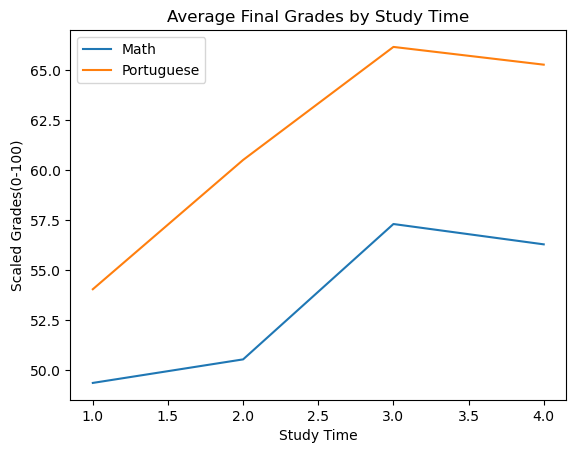

In [103]:
sns.lineplot(data=studytime_math_analysis_graph, x='studytime_math', y='mean', label='Math')
sns.lineplot(data=studytime_por_analysis_graph, x='studytime_por', y='mean', label='Portuguese')
plt.title('Average Final Grades by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Scaled Grades(0-100)')
plt.legend()
plt.show()

We can observe from the graph that the average grade increases as studytime increases until studytime reaches 3 after that there is a slight decrease in the average grade. We can also see that the average grade for portuguese is higher than average grade for mathematics for all of the equivalent study times.

#### Part 3

In [34]:
correlation_math = students.loc[:,'age'].corr(students.loc[:,'absences_math'])
correlation_math

0.176581818555583

This is a weak positive correlation. We can say that as students get older they might have more absences but its quite weak.

In [36]:
correlation_por = students.loc[:,'age'].corr(students.loc[:,'absences_por'])
correlation_por

0.14506534463300438

Very similar to the result of the above correlation but its a bit weaker.

In [38]:
correlation_avg = students.loc[:,'age'].corr((students.loc[:,'absences_math'] + students.loc[:,'absences_por']) / 2)
correlation_avg

0.12667233856755422

Again very similar but this is the weakest correlation.

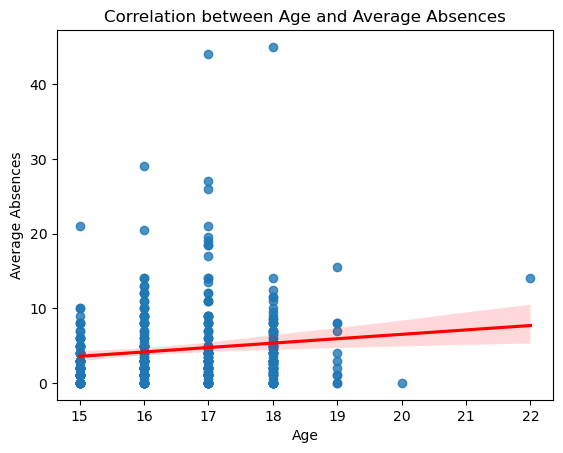

In [40]:
average_abs = (students.loc[:,'absences_math'] + students.loc[:,'absences_por']) / 2
sns.regplot(x=students.loc[:,'age'], y=average_abs,line_kws=({'color':'red'}))
plt.title('Correlation between Age and Average Absences')
plt.xlabel('Age')
plt.ylabel('Average Absences')
plt.show()

We can see the correlation between average absences and age with the scatter plot and regression line. We can see that the correlation is positive but its quite weak so there is only a slight increase overall as we can see from the angle of the line.

### Task 3

#### Part 1

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

I am assuming that overall performance is the average of the students G1, G2 and G3 grades. I will create a new column for the mean value of the grades.
These grades are not going to be scaled they are going to be in the 0-20 range again.

In [43]:
students.loc[:,'overall_performance_math'] = students.loc[:,['G1_math', 'G2_math', 'G3_math']].mean(axis=1)
students.loc[:,'overall_performance_por'] = students.loc[:,['G1_por','G2_por','G3_por']].mean(axis=1)

First I will check how dalc(workday alcohol consumption) affects the overall math performance of the students.

In [45]:
dalc_math_analysis = students.loc[:,['Dalc_math','overall_performance_math']].groupby('Dalc_math').agg(['median', 'mean'])
dalc_math_analysis

overall_performance_math           
                            median       mean
Dalc_math                                    
1.0                      11.000000  10.907925
2.0                       9.666667   9.744589
3.0                       9.666667  10.538462
4.0                       9.333333   9.814815
5.0                      11.000000  10.629630

I would have thought that with the increase of dalc the average performance would be descreasing but it is not actually the case and value flactuates a lot. Still the highest average performance belongs to the students with the 1st category meaning very low alcohol consumption.

Now I will check how walc(weekend alcohol consumption) affects the overall math performance of the students.

In [47]:
walc_math_analysis = students.loc[:,['Walc_math','overall_performance_math']].groupby('Walc_math').agg(['median', 'mean'])
walc_math_analysis

overall_performance_math           
                            median       mean
Walc_math                                    
1.0                      11.000000  10.912393
2.0                      11.166667  10.600000
3.0                      10.666667  10.839506
4.0                      10.000000   9.794872
5.0                       9.500000  10.154762

Similar results to the Dalc, we can see that again lowest alcohol consumption group has the highest average but there is no prominent descrease of performance with the increase of alcohol consumption.

And I will check walc and dalc's effects on the overall portuguese performance of the students.

In [49]:
dalc_por_analysis = students.loc[:,['Dalc_por','overall_performance_por']].groupby('Dalc_por').agg(['median', 'mean'])
dalc_por_analysis

overall_performance_por           
                          median       mean
Dalc_por                                   
1.0                    12.000000  11.957695
2.0                    11.000000  11.192412
3.0                    10.333333  10.775194
4.0                    10.333333   9.450980
5.0                    10.000000   9.941176

This is a bit more like what I expected from the results compared to the math subject ones. We can observe a decrease in average grade with the increase of alcohol consumption. Except the last category which consumes the most alcohol has a better average than group 4.

In [51]:
walc_por_analysis = students.loc[:,['Walc_por','overall_performance_por']].groupby('Walc_por').agg(['median', 'mean'])
walc_por_analysis

overall_performance_por           
                          median       mean
Walc_por                                   
1.0                    12.000000  11.982667
2.0                    12.000000  11.932900
3.0                    11.833333  11.491667
4.0                    10.666667  10.818182
5.0                    10.666667  10.444444

In this results we can see the consistent decrease of the average grade which is the expected result.

After seeing the results I want to check how many studens are in each of the alcohol consumption categories to see if we have sufficient amount of data for every category.

In [53]:
dalc_math_proportions = students.loc[:,'Dalc_math'].value_counts(normalize=True)
walc_math_proportions = students.loc[:,'Walc_math'].value_counts(normalize=True)
dalc_por_proportions = students.loc[:,'Dalc_por'].value_counts(normalize=True)
walc_por_proportions = students.loc[:,'Walc_por'].value_counts(normalize=True)

In [55]:
print(f"Proportions of Workday Alcohol Consumption (Dalc) for Math:\n{dalc_math_proportions}")
print(f"\nProportions of Weekend Alcohol Consumption (Walc) for Math:\n{walc_math_proportions}")
print(f"\nProportions of Workday Alcohol Consumption (Dalc) for Portuguese:\n{dalc_por_proportions}")
print(f"\nProportions of Weekend Alcohol Consumption (Walc) for Portuguese:\n{walc_por_proportions}")

Proportions of Workday Alcohol Consumption (Dalc) for Math:
Dalc_math
1.0    0.702703
2.0    0.189189
3.0    0.063882
4.0    0.022113
5.0    0.022113
Name: proportion, dtype: float64

Proportions of Weekend Alcohol Consumption (Walc) for Math:
Walc_math
1.0    0.383292
2.0    0.221130
3.0    0.199017
4.0    0.127764
5.0    0.068796
Name: proportion, dtype: float64

Proportions of Workday Alcohol Consumption (Dalc) for Portuguese:
Dalc_por
1.0    0.695586
2.0    0.187215
3.0    0.065449
4.0    0.025875
5.0    0.025875
Name: proportion, dtype: float64

Proportions of Weekend Alcohol Consumption (Walc) for Portuguese:
Walc_por
1.0    0.380518
2.0    0.234399
3.0    0.182648
4.0    0.133942
5.0    0.068493
Name: proportion, dtype: float64


Especially for the workday alcohol consumption(dalc) we have majority of the students in the category 1(very low) and the percentage for category 5(very high) is around 2%-3% so I can say that we dont have enough data for the high categories of alcohol consumption. Maybe this can explain why the result I got previously were not the results I expected.

I want to combine the data from por grades and math grades while still keeping them aligned with the relevant dalc and walc values. So I can make an overall analysis without differentiating the subjects.

In [57]:
combined_subject = pd.DataFrame({
    'Performance': students.loc[:,['overall_performance_math', 'overall_performance_por']].stack().values,
    'Dalc': students.loc[:,['Dalc_math', 'Dalc_por']].stack().values,
    'Walc': students.loc[:,['Walc_math', 'Walc_por']].stack().values
})

In [59]:
students.loc[:,['Dalc_por','Dalc_math','Walc_por','Walc_math','overall_performance_math', 'overall_performance_por']].head()

,Dalc_por,Dalc_math,Walc_por,Walc_math,overall_performance_math,overall_performance_por
0,1.0,1.0,1.0,1.0,9.000000,13.000000
1,1.0,NaN,1.0,NaN,NaN,8.666667
2,2.0,2.0,4.0,4.0,6.333333,11.666667
3,1.0,1.0,1.0,1.0,13.333333,13.000000
4,1.0,1.0,1.0,1.0,9.000000,10.333333


In [61]:
combined_subject.head()

,Performance,Dalc,Walc
0,9.000000,1.0,1.0
1,13.000000,1.0,1.0
2,8.666667,1.0,1.0
3,6.333333,2.0,4.0
4,11.666667,2.0,4.0


Now I have every por or math performance with the respective dalc and walc values for that subject.

In [63]:
dalc_analysis = combined_subject.loc[:,['Dalc','Performance']].groupby('Dalc').agg(['mean', 'median', 'count'])
dalc_analysis

Performance                 
            mean     median count
Dalc                             
1.0    11.553611  11.666667   743
2.0    10.635000  10.666667   200
3.0    10.685990  10.333333    69
4.0     9.576923  10.166667    26
5.0    10.179487  10.333333    26

Now also with the number of students that fall into the dalc categories, we can see that we don't have enough students in the higher categories compared to the lower categories. But we can still observe that lowest consumption category has the highest average grade.

In [65]:
walc_analysis = combined_subject.loc[:,['Walc','Performance']].groupby('Walc').agg(['mean', 'median', 'count'])
walc_analysis

Performance                 
            mean     median count
Walc                             
1.0    11.571429  11.666667   406
2.0    11.441257  11.666667   244
3.0    11.228856  11.333333   201
4.0    10.438095  10.333333   140
5.0    10.333333  10.333333    73

For walc the number of students we have in different categories is a bit more balanced and the results are more like what I expected.

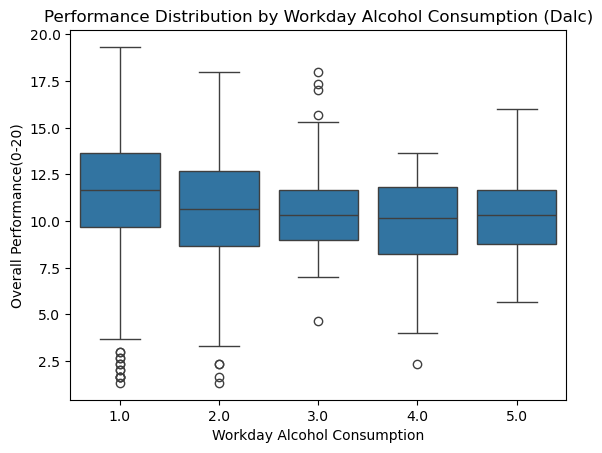

In [67]:
sns.boxplot(data=combined_subject, x='Dalc', y='Performance')
plt.title('Performance Distribution by Workday Alcohol Consumption (Dalc)')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Overall Performance(0-20)')
plt.show()

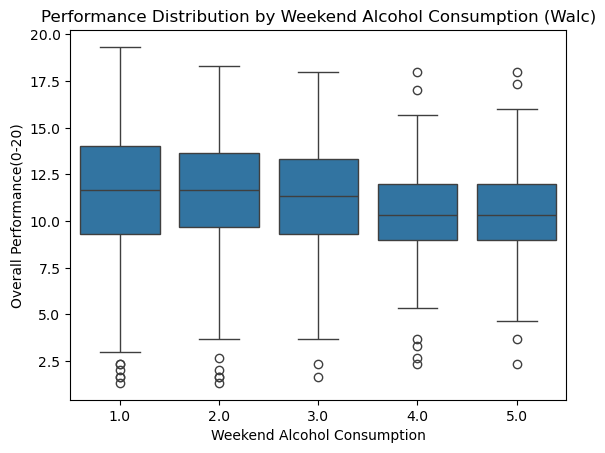

In [69]:
sns.boxplot(data=combined_subject, x='Walc', y='Performance')
plt.title('Performance Distribution by Weekend Alcohol Consumption (Walc)')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Overall Performance(0-20)')
plt.show()

Looking at this boxplots we can see the outliers for the categories, we can also see the median and the quartile values.

#### Part 2

Because we have 'romantic_math' and 'romantic_por' columns in our dataframe I will be checking them with the corresponding subjects performance.

In [71]:
romantic_math_analysis_performance = students.loc[:,['romantic_math','overall_performance_math']].groupby('romantic_math').agg(['mean', 'median'])
romantic_math_analysis_performance

overall_performance_math           
                                  mean     median
romantic_math                                    
no                           10.887668  10.666667
yes                          10.116915  10.500000

In [73]:
romantic_por_analysis_performance = students.loc[:,['romantic_por','overall_performance_por']].groupby('romantic_por').agg(['mean', 'median'])
romantic_por_analysis_performance

overall_performance_por           
                                mean     median
romantic_por                                   
no                         11.819712  11.666667
yes                        11.275242  11.333333

We can observe that students who are not in romantic relationships perform better in both of the subjects.

Again I will be analysing 'romantic_por' with 'higher_por' and 'romantic_math' with 'higher_math'. Because higher is a yes or no value I will be counting them then finding the relative frequency.

In [75]:
romantic_por_analysis_higher = students.loc[:,['romantic_por','higher_por']].groupby('romantic_por').value_counts(normalize=True)
romantic_por_analysis_higher

romantic_por  higher_por
no            yes           0.915865
              no            0.084135
yes           yes           0.850622
              no            0.149378
Name: proportion, dtype: float64

In [77]:
romantic_math_analysis_higher = students.loc[:,['romantic_math','higher_math']].groupby('romantic_math').value_counts(normalize=True)
romantic_math_analysis_higher

romantic_math  higher_math
no             yes            0.963370
               no             0.036630
yes            yes            0.910448
               no             0.089552
Name: proportion, dtype: float64

For both math and portuguese the percentage of students who wants to take higher education is higher for students who are single. We can also observe that for math percentage of students who wants to take higher education is higher than portuguese.

I will take same approach I took before with the walc and dalc. I will stack the average grade values and the romantic values so I can analyse for the 2 subjects overall.

In [79]:
combined_romantic = pd.DataFrame({
    'Performance': students.loc[:, ['overall_performance_math', 'overall_performance_por']].stack().values,
    'Romantic': students.loc[:, ['romantic_math', 'romantic_por']].stack().values
})

In [81]:
combined_romantic.head()

,Performance,Romantic
0,9.000000,no
1,13.000000,no
2,8.666667,yes
3,6.333333,yes
4,11.666667,yes


In [83]:
students.loc[:,['romantic_math','romantic_por','overall_performance_math', 'overall_performance_por']].head()

,romantic_math,romantic_por,overall_performance_math,overall_performance_por
0,no,no,9.000000,13.000000
1,NaN,yes,NaN,8.666667
2,yes,yes,6.333333,11.666667
3,no,no,13.333333,13.000000
4,no,no,9.000000,10.333333


The combined table looks like how it should be so I will aggragate it.

In [85]:
romantic_analysis = combined_romantic.groupby('Romantic')['Performance'].agg(['mean', 'median', 'count'])
romantic_analysis

,mean,median,count
Romantic,,,
no,11.450411,11.333333,689
yes,10.861333,11.000000,375


We can observe that students who are not in romantic relationships have the better mean grade, there is also more students who are single.

I want to a different approach for analysing the romantic's effect on higher. I noticed that differences between math and portuguese values for higher and romantic were quite few for the students that were in both of the subjects data as shown below.

In [87]:
students[(students.loc[:,"_merge"]=='both') & (students.loc[:,"higher_por"] != students.loc[:,"higher_math"])].loc[:,['higher_por','higher_math']]

,higher_por,higher_math
332,yes,no
333,no,yes
369,no,yes
370,yes,no


In [89]:
students[(students.loc[:,"_merge"]=='both') & (students.loc[:,"romantic_math"] != students.loc[:,"romantic_por"])].loc[:,['romantic_por','romantic_math']]

,romantic_por,romantic_math
157,yes,no
319,no,yes
320,yes,no
332,no,yes
333,yes,no
569,yes,no


I will use the combine_first function so that the math values are taken if we dont have the portuguese value for the student.

In [91]:
combined_romantic_higher = pd.DataFrame({
    'Romantic': students['romantic_por'].combine_first(students['romantic_math']),
    'Higher': students['higher_por'].combine_first(students['higher_math']),
})

In [93]:
romantic_higher_analysis = combined_romantic_higher.groupby('Romantic')['Higher'].value_counts(normalize=True)
romantic_higher_analysis

Romantic  Higher
no        yes       0.911215
          no        0.088785
yes       yes       0.854331
          no        0.145669
Name: proportion, dtype: float64

In [95]:
romantic_higher_analysis.unstack()

Higher,no,yes
Romantic,,
no,0.088785,0.911215
yes,0.145669,0.854331


We can see that the percentage of students who want to take higher education is higher for the group of students who do not have a romantic relationship.

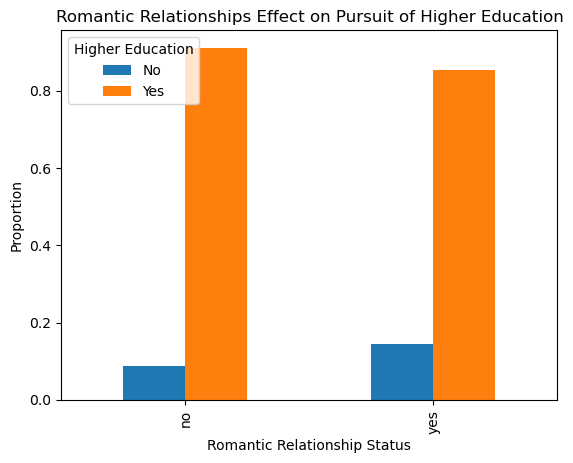

In [97]:
romantic_higher_analysis_graph = romantic_higher_analysis.unstack()
graph = romantic_higher_analysis_graph.plot(kind='bar', stacked=False)
plt.title('Romantic Relationships Effect on Pursuit of Higher Education')
plt.xlabel('Romantic Relationship Status')
plt.ylabel('Proportion')
plt.legend(title='Higher Education', labels=['No', 'Yes'],loc ='upper left')
plt.show()

We can also see from the graph that around 90% of single students wants to pursue higher education while around 85% of students who are in a relationship wants to pursue higher education.